In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [23]:
           
def scrape_books_large():
    base_url = "http://books.toscrape.com/catalogue/page-{}.html"
    all_books = []

    # Define a static conversion rate (1 GBP = 100 INR)
    conversion_rate = 100  

    # Loop through all pages
    page = 1
    while True:
        url = base_url.format(page)
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        
        if response.status_code != 200:
            print(f"Finished scraping at page {page - 1}.")
            break

        soup = BeautifulSoup(response.content, 'html.parser')
        books = soup.find_all("article", class_="product_pod")
        if not books:
            break

        for book in books:
            name = book.h3.a["title"]
            price_gbp = book.find("p", class_="price_color").text.strip('£')  # Remove GBP symbol
            price_inr = round(float(price_gbp) * conversion_rate, 2)  # Convert to INR
            availability = book.find("p", class_="instock availability").text.strip()
            
            # Simulated ratings
            rating_class = book.find("p", class_="star-rating")["class"]
            rating = rating_class[1]  # Extract rating class (e.g., "One", "Two", etc.)
            
            # Map rating class to numeric values
            rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
            numeric_rating = rating_map.get(rating, "No Rating")

            all_books.append({
                "Name": name,
                "Price (GBP)": f"£{price_gbp}",
                "Price (INR)": f"₹{price_inr}",
                "Availability": availability,
                "Rating": numeric_rating
            })

        print(f"Scraped page {page}.")
        page += 1
        time.sleep(1)  # Avoid overwhelming the server

    return pd.DataFrame(all_books)
def process_and_clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Handle missing values: Drop rows with any missing data
    df = df.dropna()

    # Standardize and clean 'Price' column
    df['Price (GBP)'] = df['Price (GBP)'].str.replace('£', '').astype(float)
    df['Price (INR)'] = df['Price (INR)'].str.replace('₹', '').astype(float)

    # Standardize and clean 'Rating' column
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    # Clean 'Availability' column (e.g., "In stock" -> "Yes", else "No")
    df['Availability'] = df['Availability'].apply(lambda x: 'Yes' if 'In stock' in x else 'No')

    # Ensure consistent column names
    df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

    return df

# Example usage
books_df = scrape_books_large()
cleaned_books_df = process_and_clean_data(books_df)
cleaned_books_df.to_csv("cleaned_books_data.csv", index=False)
print("Cleaned data saved to cleaned_books_data.csv")


Scraped page 1.
Scraped page 2.
Scraped page 3.
Scraped page 4.
Scraped page 5.
Scraped page 6.
Scraped page 7.
Scraped page 8.
Scraped page 9.
Scraped page 10.
Scraped page 11.
Scraped page 12.
Scraped page 13.
Scraped page 14.
Scraped page 15.
Scraped page 16.
Scraped page 17.
Scraped page 18.
Scraped page 19.
Scraped page 20.
Scraped page 21.
Scraped page 22.
Scraped page 23.
Scraped page 24.
Scraped page 25.
Scraped page 26.
Scraped page 27.
Scraped page 28.
Scraped page 29.
Scraped page 30.
Scraped page 31.
Scraped page 32.
Scraped page 33.
Scraped page 34.
Scraped page 35.
Scraped page 36.
Scraped page 37.
Scraped page 38.
Scraped page 39.
Scraped page 40.
Scraped page 41.
Scraped page 42.
Scraped page 43.
Scraped page 44.
Scraped page 45.
Scraped page 46.
Scraped page 47.
Scraped page 48.
Scraped page 49.
Scraped page 50.
Finished scraping at page 50.
Cleaned data saved to cleaned_books_data.csv


In [24]:
df = pd.read_csv('cleaned_books_data.csv')


In [25]:
df

,name,price_(gbp),price_(inr),availability,rating
0,A Light in the Attic,51.77,5177.0,Yes,3
1,Tipping the Velvet,53.74,5374.0,Yes,1
2,Soumission,50.10,5010.0,Yes,1
3,Sharp Objects,47.82,4782.0,Yes,4
4,Sapiens: A Brief History of Humankind,54.23,5423.0,Yes,5
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,5553.0,Yes,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,5706.0,Yes,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,1697.0,Yes,5
998,1st to Die (Women's Murder Club #1),53.98,5398.0,Yes,1


In [26]:
df.head()


,name,price_(gbp),price_(inr),availability,rating
0,A Light in the Attic,51.77,5177.0,Yes,3
1,Tipping the Velvet,53.74,5374.0,Yes,1
2,Soumission,50.10,5010.0,Yes,1
3,Sharp Objects,47.82,4782.0,Yes,4
4,Sapiens: A Brief History of Humankind,54.23,5423.0,Yes,5


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1000 non-null   object 
 1   price_(gbp)   1000 non-null   float64
 2   price_(inr)   1000 non-null   float64
 3   availability  1000 non-null   object 
 4   rating        1000 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [28]:
df.describe()


,price_(gbp),price_(inr),rating
count,1000.00000,1000.000000,1000.000000
mean,35.07035,3507.035000,2.923000
std,14.44669,1444.668967,1.434967
min,10.00000,1000.000000,1.000000
25%,22.10750,2210.750000,2.000000
50%,35.98000,3598.000000,3.000000
75%,47.45750,4745.750000,4.000000
max,59.99000,5999.000000,5.000000


In [29]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'data.csv' with your actual file name)
df = pd.read_csv('cleaned_books_data.csv')

#

# Shape of the dataset
print("\nShape of the Dataset:")
print(df.shape)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {duplicate_rows.shape[0]}")




Shape of the Dataset:
(1000, 5)

Number of Duplicate Rows: 0



Correlation Matrix:
             price_(gbp)  price_(inr)    rating
price_(gbp)     1.000000     1.000000  0.028166
price_(inr)     1.000000     1.000000  0.028166
rating          0.028166     0.028166  1.000000


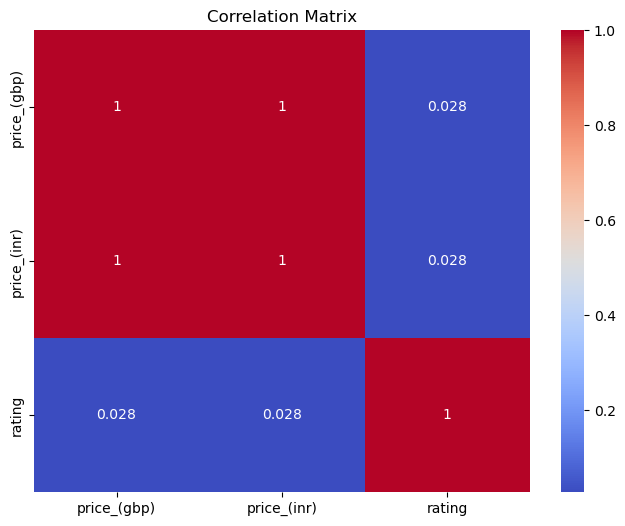

In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number', 'float64', 'int64'])

# Compute the correlation matrix for numeric columns
print("\nCorrelation Matrix:")
print(numeric_df.corr())

# Visualize the correlation matrix if needed


plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
